<a href="https://colab.research.google.com/github/starkjones/Vienna-Air-BnB-Analysis/blob/main/Vienna_Air_BnB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AIR BnB VIENNA ANALYSIS**

Jonathan Jones

22.05.05

In [61]:
# Import Libraries:

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **PRIMARY DATASET**

In [62]:
# Data Frame construction and preview of data:

data = '/content/drive/MyDrive/SI/Vienna Austria Airbnb.csv'
df = pd.read_csv(data)

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15883,b&b near Old Danube river,62142,Eva,NaN,Donaustadt,48.24262,16.42767,Hotel room,120,1,14,2021-10-07,0.17,3,364,3,NaN
1,38768,central cityapartement- wifi- nice neighbourhood,166283,Hannes,NaN,Leopoldstadt,48.21924,16.37831,Entire home/apt,66,3,336,2021-11-14,2.57,3,124,13,NaN
2,40625,"Near Palace Schönbrunn, Apt. 1",175131,Ingela,NaN,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire home/apt,156,1,162,2021-11-01,1.17,15,306,7,NaN
3,51287,little studio- next to citycenter- wifi- nice ...,166283,Hannes,NaN,Leopoldstadt,48.21778,16.37847,Entire home/apt,62,3,327,2021-11-22,2.47,3,136,18,NaN
4,70637,Flat in the Center with Terrace,358842,Elxe,NaN,Leopoldstadt,48.21760,16.38018,Private room,50,2,117,2021-06-25,0.90,3,333,1,NaN


1) Source of data:

http://insideairbnb.com/get-the-data/

2) Brief description of data.

  Rental metrics for AirBnB hosts in Vienna Austria. 

3) What is the target?

  Number of reviews.

4) Is this a classification or regression problem?

  This is regression problem as the target value is not limited to a finite number of classes or values. 

5) How many features?

  18-1(target) columns = 17 features. 

6) How many rows of data.

  11429

7) What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

At a glance there are several columns that appear to be irrelevant to our target. I wonder if this dataset contains enough relevant features to make a meaningful prediction.

In [63]:
# Shape of Data Frame:

df.shape

# 11429 rows 
# 18 columns

(11429, 18)

In [64]:
# Unadulterated copy for Machine Learning:

df_ML = df.copy()

In [65]:
# Preliminary check of column names, datatypes and entry quantities:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11429 non-null  int64  
 1   name                            11416 non-null  object 
 2   host_id                         11429 non-null  int64  
 3   host_name                       11411 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11429 non-null  object 
 6   latitude                        11429 non-null  float64
 7   longitude                       11429 non-null  float64
 8   room_type                       11429 non-null  object 
 9   price                           11429 non-null  int64  
 10  minimum_nights                  11429 non-null  int64  
 11  number_of_reviews               11429 non-null  int64  
 12  last_review                     

In [66]:
# Changing all column names to lowercase:

df.columns = df.columns.str.lower()

In [67]:
# Check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11429 non-null  int64  
 1   name                            11416 non-null  object 
 2   host_id                         11429 non-null  int64  
 3   host_name                       11411 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11429 non-null  object 
 6   latitude                        11429 non-null  float64
 7   longitude                       11429 non-null  float64
 8   room_type                       11429 non-null  object 
 9   price                           11429 non-null  int64  
 10  minimum_nights                  11429 non-null  int64  
 11  number_of_reviews               11429 non-null  int64  
 12  last_review                     

##**DATA CLEANING & PREPARATION**

In [68]:
# Removal of ineffectual columns:
remove = {'id', 'name','host_id', 'host_name', 'neighbourhood_group', 'license'}
df.drop(columns = remove, inplace = True)

In [69]:
# Check for duplciated rows:

df.duplicated().sum()

10

In [70]:
# Check for missing values:

df.isna().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2338
reviews_per_month                 2338
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Imputation Strategy: 

last review:       missing 2338 / 11429 or 20.46 % of its entries

> Forward fill (ffill) for imputation 

reviews per month: missing 2338 / 11429 or 20.46 % of its entries

> mean for imputation


In [81]:
df['last_review'].value_counts()

2021-11-21    649
2021-11-22    422
2021-11-14    376
2021-11-20    296
2021-11-01    204
             ... 
2017-08-02      1
2015-07-25      1
2018-11-16      1
2019-01-18      1
2021-06-23      1
Name: last_review, Length: 1577, dtype: int64

In [83]:
# Convert last review to date time:

df['last_review'] = pd.to_datetime(df['last_review'])

# Convert to numeric:

df['last_review'].value_counts()

2021-11-21    649
2021-11-22    422
2021-11-14    376
2021-11-20    296
2021-11-01    204
             ... 
2017-08-02      1
2015-07-25      1
2018-11-16      1
2019-01-18      1
2021-06-23      1
Name: last_review, Length: 1577, dtype: int64

In [84]:
# Imputation:

mean = df['number_of_reviews'].mean()

df['last_review'].fillna(2021-11-21, inplace =True)
df['reviews_per_month'].fillna(mean, inplace = True)

In [85]:
# Final check for missing values:

df.isna().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [86]:
# Checking value names in object columns for inconsistencies:

datatypes = df.dtypes
object_cols = datatypes[datatypes =='object'].index
object_cols

for column in object_cols:
  print(f'Column Name = {column}')
  print('\n')
  print(df[column].value_counts(dropna=False))
  print('\n\n')

Column Name = neighbourhood


Leopoldstadt            1229
Landstra§e              1022
Rudolfsheim-Fnfhaus     862
Favoriten                691
Alsergrund               682
Neubau                   678
Innere Stadt             622
Margareten               615
Ottakring                581
Mariahilf                531
Wieden                   469
Meidling                 457
Brigittenau              429
Josefstadt               428
Donaustadt               380
Whring                  338
Hernals                  337
Penzing                  295
Dbling                  246
Floridsdorf              186
Hietzing                 141
Simmering                137
Liesing                   73
Name: neighbourhood, dtype: int64



Column Name = room_type


Entire home/apt    8591
Private room       2694
Shared room          80
Hotel room           64
Name: room_type, dtype: int64





In [87]:
# Check for insconsistencies and odd numeric entries:

df.describe().round(1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,11429.0,11429.0,11429.0,11429.0,11429.0,11429.0,11429.0,11429.0,11429.0
mean,48.2,16.4,83.1,6.0,31.9,7.4,15.0,143.3,5.0
std,0.0,0.0,185.4,24.3,61.2,12.5,38.2,143.7,11.0
min,48.1,16.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,48.2,16.3,40.0,1.0,1.0,0.2,1.0,0.0,0.0
50%,48.2,16.4,60.0,2.0,7.0,1.0,2.0,90.0,0.0
75%,48.2,16.4,90.0,3.0,33.0,3.9,9.0,310.0,5.0
max,48.3,16.5,9999.0,1125.0,632.0,48.5,243.0,365.0,396.0


##**VISUAL ANALYSIS**

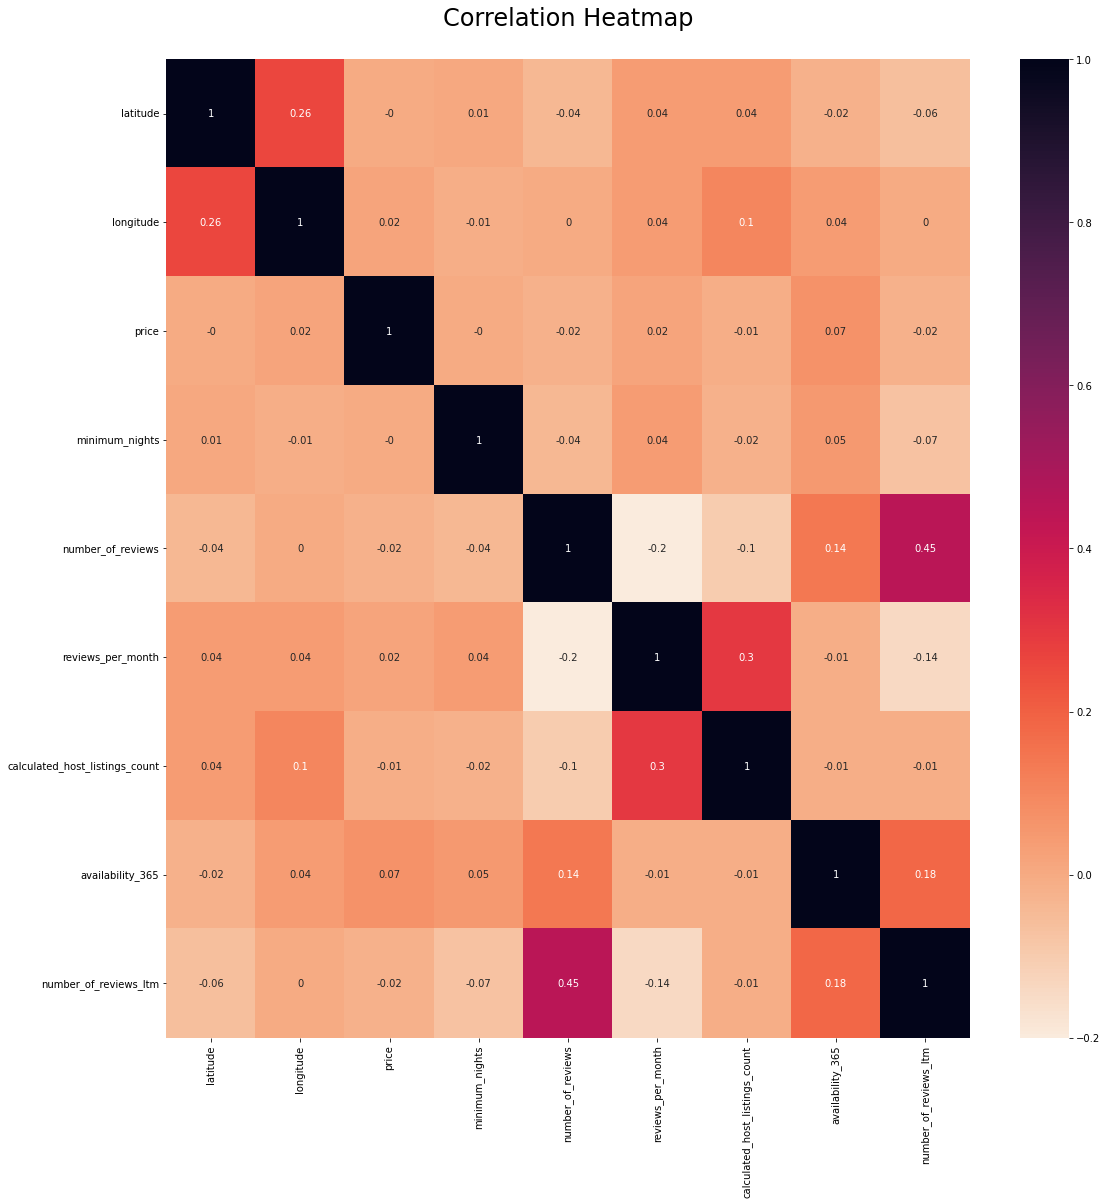

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation map to ascertain related features:

correlation = df.corr().round(2)

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(18,18));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

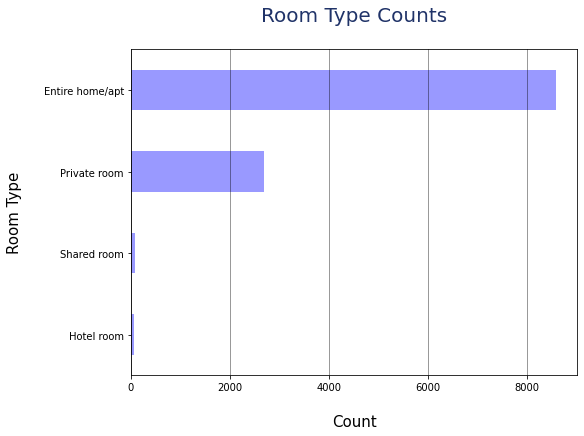

In [89]:
room = df['room_type'].value_counts().sort_values(ascending=True)

room.plot(kind='barh', alpha = .4, color='blue', figsize= (8,6), );
plt.title('Room Type Counts\n', alpha= .9, color= '#081d58', fontsize =20)
plt.xlabel('\nCount', fontsize = 15)
plt.ylabel('Room Type\n', fontsize = 15)
plt.grid(axis ='x', color ='black', alpha=.5)
plt.show()

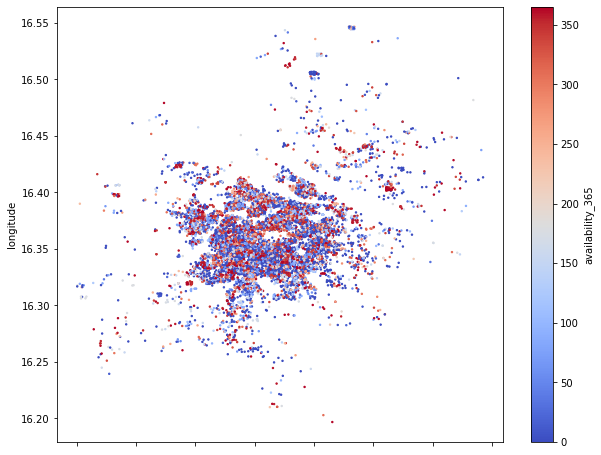

In [90]:
df.plot(kind = 'scatter', x = 'latitude', y = 'longitude', c = 'availability_365', cmap = 'coolwarm', figsize = (10,8), s =2);

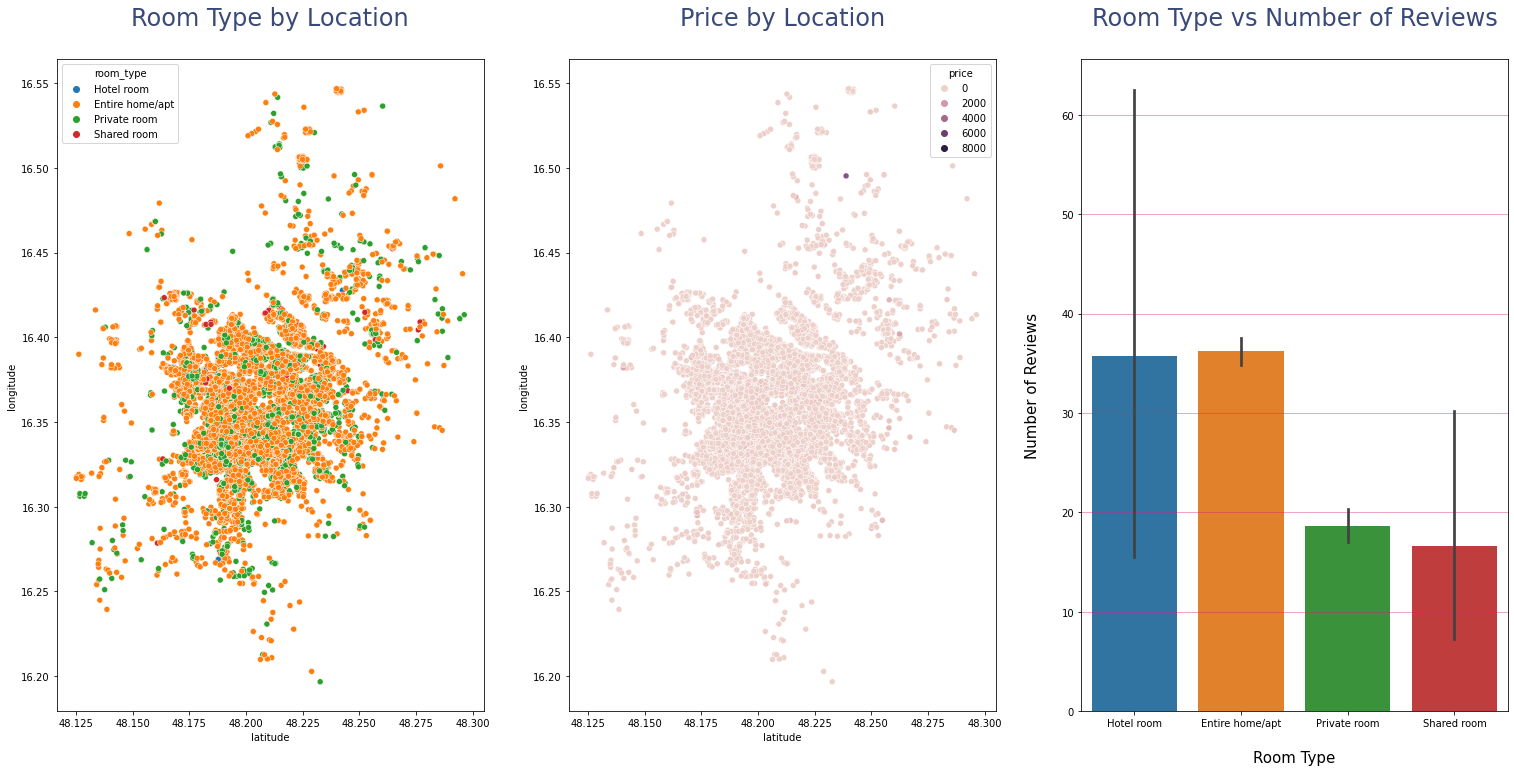

In [92]:
fig, axes = plt.subplots(nrows=1, ncols =3, figsize=(26,12));
rev = sns.barplot(data =df,x='room_type', y= 'number_of_reviews', ax=axes[2]);
rev.set_title('Room Type vs Number of Reviews\n', alpha= .8, c= '#081d58', fontsize =24);

scat = sns.scatterplot(data =df,x='latitude', y= 'longitude', hue = 'room_type', ax=axes[0]);
scat.set_title('Room Type by Location\n', alpha= .8, color= '#081d58', fontsize =24);

scat2 = sns.scatterplot(data =df,x='latitude', y= 'longitude', hue = 'price', hue_norm = (0, 8000), ax=axes[1]);
scat2.set_title('Price by Location\n', alpha= .8, color= '#081d58', fontsize =24);

plt.xlabel('\nRoom Type', fontsize = 15)
plt.ylabel('Number of Reviews\n', fontsize = 15)
plt.grid(axis ='y', color ='#dd1c77', alpha=.5)
plt.show()

